# Fractional Gates

This page introduces two newly supported gate types on the IBM Quantum fleet of QPUs, $R_{ZZ}(\theta)$ and $R_X(\theta)$, and discusses the usecases which enable your quantum workflows to become more efficient. 

### Page outline

- Go over what these gates are
- Explain the situation in which these gates can be used (and why they are more efficient).
  - Go over the example usecase of simulating an Ising system.
- Explain the syntax for these gates.
- How do they differ from parametrized gates.   

## Where to use fractional gates

Historically, the basis gates available on QPUs in the fleet of IBM Quantum hardware have been **ECR**, **X**, **RZ**, **SX**, and **ID** which creates a constraint on circuits with single and two-qubit rotations. For example, an $R_X(\theta)$ gate, when transpiled to a QPU in the IBM Quantum fleet, must decompose into a series of $RZ$ and $\sqrt{X}$ gates -- creating a circuit with a depth of five instead of one.

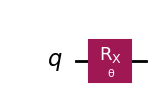

In [27]:
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

from qiskit_ibm_runtime import QiskitRuntimeService
import numpy as np

qc = QuantumCircuit(1)
param = Parameter('θ')
qc.rx(param, 0)
qc.draw('mpl')

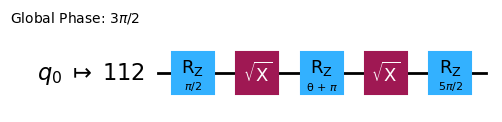

In [28]:
# Decomposition of an RX(θ) gate using the IBM Quantum QPU basis
service = QiskitRuntimeService()
backend = service.least_busy()
optimization_level = 3
pm = generate_preset_pass_manager(optimization_level, backend=backend)
transpiled_circuit = pm.run(qc)
transpiled_circuit.draw('mpl', idle_wires=False)

And the same is true for two-qubit rotations such as an $R_{ZZ}(\theta)$ gate. When transpiled to an IBM Quantum QPU, the decomposition requires two **ECR** gates and several single qubit gates, significantly increasing the circuit depth.

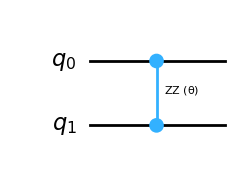

In [29]:
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

from qiskit_ibm_runtime import QiskitRuntimeService
import numpy as np

qc = QuantumCircuit(2)
param = Parameter('θ')
qc.rzz(param, 0, 1)
qc.draw('mpl')

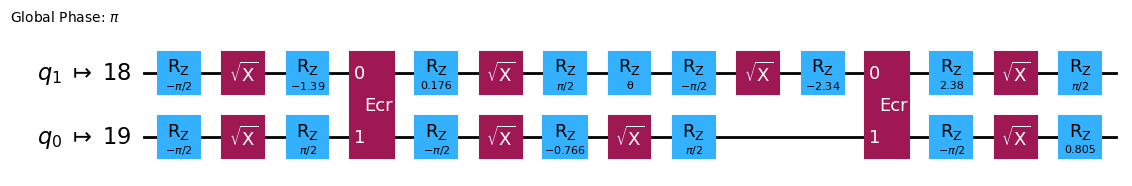

In [30]:
# Decomposition of an RZZ(θ) gate using the IBM Quantum QPU basis
service = QiskitRuntimeService()
backend = service.least_busy()
optimization_level = 3
pm = generate_preset_pass_manager(optimization_level, backend=backend)
transpiled_circuit = pm.run(qc)
transpiled_circuit.draw('mpl', idle_wires=False)

For workflows that require many single qubit $R_X(\theta)$ or two-qubit rotations, especially ones where the rotation angle $\theta$ is small (such as in a variational ansatze or when simulating the time evolution of quantum systems), this constraint causes the circuit depth to grow quite quickly. Thankfully however, the fleet of IBM Quantum QPUs now support *fractional gates* which can significantly reduce the circuit depth for workflows like these.

## How to use fractional gates

Internally, these fractional gates work by dynamically modifying the microwave pulses that are sent to indivdual qubits based on the angle, $\theta$, that a circuit instruction specifies. 

*Also discuss how the error of these gates scales with the angle specified*

In [ ]:
# Specify a backend which has fractional gates enabled, allowing a transpiler pass manager to take that into its own context
service = QiskitRuntimeService()
backend_fractional = service.backend("some_backend", use_fractional_gates=True)